In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing CSV file - Bitcoin

In [2]:
bitcoin = pd.read_csv("C:\Temp\Bitcoin.csv")

In [3]:
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
bitcoin2 = bitcoin.rename(columns={'Adj Close':'Price'})

In [5]:
print(bitcoin2.head())

         Date        Open        High         Low       Close       Price  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


# Convert daily dates to monthly dates for returns

Firstly, we need a monthly date from datetime object using .dt method

In [6]:
bitcoin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2683 non-null   object 
 1   Open    2683 non-null   float64
 2   High    2683 non-null   float64
 3   Low     2683 non-null   float64
 4   Close   2683 non-null   float64
 5   Price   2683 non-null   float64
 6   Volume  2683 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 146.9+ KB


Must convert datetype from object to datetime.

In [7]:
bitcoin2['Date'] = pd.to_datetime(bitcoin2['Date'])

In [8]:
bitcoin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2683 non-null   datetime64[ns]
 1   Open    2683 non-null   float64       
 2   High    2683 non-null   float64       
 3   Low     2683 non-null   float64       
 4   Close   2683 non-null   float64       
 5   Price   2683 non-null   float64       
 6   Volume  2683 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 146.9 KB


Date object type column converted to Datetime

In [10]:
bitcoin2['mdate']=bitcoin2['Date'].dt.to_period("M")

In [11]:
print(bitcoin2.head())

        Date        Open        High         Low       Close       Price  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume    mdate  
0  21056800  2014-09  
1  34483200  2014-09  
2  37919700  2014-09  
3  36863600  2014-09  
4  26580100  2014-09  


Only interested in mdate and price columns

In [25]:
bitcoin3= bitcoin2[['mdate','Price']]

In [26]:
print(bitcoin3.head())

     mdate       Price
0  2014-09  457.334015
1  2014-09  424.440002
2  2014-09  394.795990
3  2014-09  408.903992
4  2014-09  398.821014


returning nulls

In [32]:
bitcoin3.isnull().any()

mdate    False
Price    False
dtype: bool

In [33]:
bitcoin3.drop_duplicates(subset=['Price']).head()

,mdate,Price
0,2014-09,457.334015
1,2014-09,424.440002
2,2014-09,394.795990
3,2014-09,408.903992
4,2014-09,398.821014


# Importing S&P 500 

In [34]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

start=datetime.datetime(2014,1,1)
end=datetime.datetime(2022,1,1)
SP500= web.DataReader (['sp500'], 'fred', start, end)
print(SP500)

              sp500
DATE               
2014-01-01      NaN
2014-01-02  1831.98
2014-01-03  1831.37
2014-01-06  1826.77
2014-01-07  1837.88
...             ...
2021-12-27  4791.19
2021-12-28  4786.35
2021-12-29  4793.06
2021-12-30  4778.73
2021-12-31  4766.18

[2088 rows x 1 columns]


In [37]:
SP500.head()

,sp500
DATE,
2014-01-02,1831.98
2014-01-03,1831.37
2014-01-06,1826.77
2014-01-07,1837.88
2014-01-08,1837.49


# Drop NA values

In [39]:
SP500.dropna(inplace=True)

In [40]:
print(SP500.head())

              sp500
DATE               
2014-01-02  1831.98
2014-01-03  1831.37
2014-01-06  1826.77
2014-01-07  1837.88
2014-01-08  1837.49


In [41]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2015 entries, 2014-01-02 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp500   2015 non-null   float64
dtypes: float64(1)
memory usage: 31.5 KB


The date range of this dataset is from 2014-2021

In [42]:
SP500BTC = bitcoin3.merge(SP500, how='inner',right_index = True, left_index=True)

In [43]:
print(SP500BTC)

Empty DataFrame
Columns: [mdate, Price, sp500]
Index: []


# Importing Cyrtocurrencies from YahooFinance

In [44]:
# list of crptocurrencies as ticker arguments
cryptocurrencies = ['BNB-USD','BTC-USD', 'ETH-USD', 'XRP-USD']

Analysing changes in the crypto market since Covid 19. The start date is the first of January 2020

In [47]:
crypto = yf.download(cryptocurrencies, start='2020-01-01',
                end='2021-12-12')
crypto.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                         Close  \
              BNB-USD      BTC-USD     ETH-USD   XRP-USD    BNB-USD   
Date                                                                  
2020-01-01  13.689083  7200.174316  130.802002  0.192667  13.689083   
2020-01-02  13.027011  6985.470215  127.410179  0.188043  13.027011   
2020-01-03  13.660452  7344.884277  134.171707  0.193521  13.660452   
2020-01-04  13.891512  7410.656738  135.069366  0.194355  13.891512   
2020-01-05  14.111019  7411.317383  136.276779  0.195537  14.111019   

                                                    High               ...  \
                BTC-USD     ETH-USD   XRP-USD    BNB-USD      BTC-USD  ...   
Date                                                                   ...   
2020-01-01  7200.174316  130.802002  0.192667  13.873946  7254.330566  ...   
2020-01-02  6985.470215  127.410179  0.188043  13.715548  7212.155273  ...   
2020-01-03  7344.884277  134.171707  0.193521  13.763709  7413.715332  ...   
2020-01-04  7410.656738  135.069366  0.194355  13.921914  7427.385742  ...   
2020-01-05  7411.317383  136.276779  0.195537  14.410801  7544.497070  ...   

                   Low                 Open                           \
               ETH-USD   XRP-USD    BNB-USD      BTC-USD     ETH-USD   
Date                                                                   
2020-01-01  129.198288  0.192107  13.730962  7194.892090  129.630661   
2020-01-02  126.954910  0.186947  13.698126  7202.551270  130.820038   
2020-01-03  126.490021  0.185846  13.035329  6984.428711  127.411263   
2020-01-04  133.040558  0.191835  13.667442  7345.375488  134.168518   
2020-01-05  135.045624  0.193884  13.888340  7410.451660  135.072098   

                         Volume                                        
             XRP-USD    BNB-USD      BTC-USD      ETH-USD     XRP-USD  
Date                                                                   
2020-01-01  0.192912  172980718  18565664997   7935230330  1041134003  
2020-01-02  0.192708  156376427  20802083465   8032709256  1085351426  
2020-01-03  0.187948  173683857  28111481032  10476845358  1270017043  
2020-01-04  0.193521  182230374  18444271275   7430904515   999331594  
2020-01-05  0.194367  202552703  19725074095   7526675353  1168067557  

[5 rows x 24 columns]

In [48]:
crypto.isnull().any()

Adj Close  BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
Close      BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
High       BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
Low        BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
Open       BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
Volume     BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
dtype: bool

Data frame contains no missing data. 

Only interested in Adj Close as it's the closing price after adjustments for splits and dividend

In [49]:
adj_close=crypto['Adj Close']
adj_close.head()

,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,
2020-01-01,13.689083,7200.174316,130.802002,0.192667
2020-01-02,13.027011,6985.470215,127.410179,0.188043
2020-01-03,13.660452,7344.884277,134.171707,0.193521
2020-01-04,13.891512,7410.656738,135.069366,0.194355
2020-01-05,14.111019,7411.317383,136.276779,0.195537


# Plotting Adjusted Closing Price: Time Series

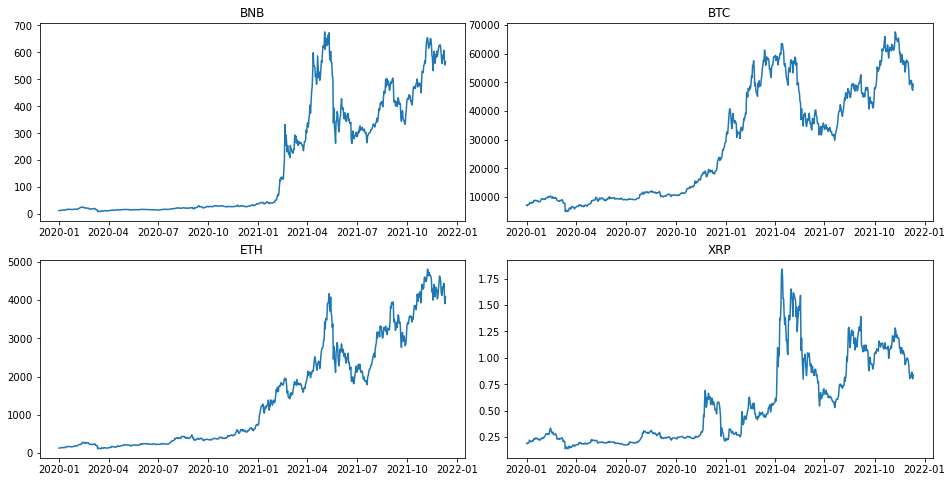

In [51]:
# ploting the adjusted closing price
fig, axs =plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(adj_close['BNB-USD'])
axs[0,0].set_title('BNB')
axs[0,1].plot(adj_close['BTC-USD'])
axs[0,1].set_title('BTC')
axs[1,0].plot(adj_close['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,1].plot(adj_close['XRP-USD'])
axs[1,1].set_title('XRP')
plt.show()

# Return Series 

Returns = the  percentage change in the Adj Closeing Price

In [52]:
returns = adj_close.pct_change().dropna(axis=0)

In [53]:
returns.head()

,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,
2020-01-02,-0.048365,-0.029819,-0.025931,-0.024000
2020-01-03,0.048625,0.051452,0.053069,0.029132
2020-01-04,0.016915,0.008955,0.006690,0.004310
2020-01-05,0.015802,0.000089,0.008939,0.006082
2020-01-06,0.060009,0.048291,0.058905,0.132829


# Plotting the Returns

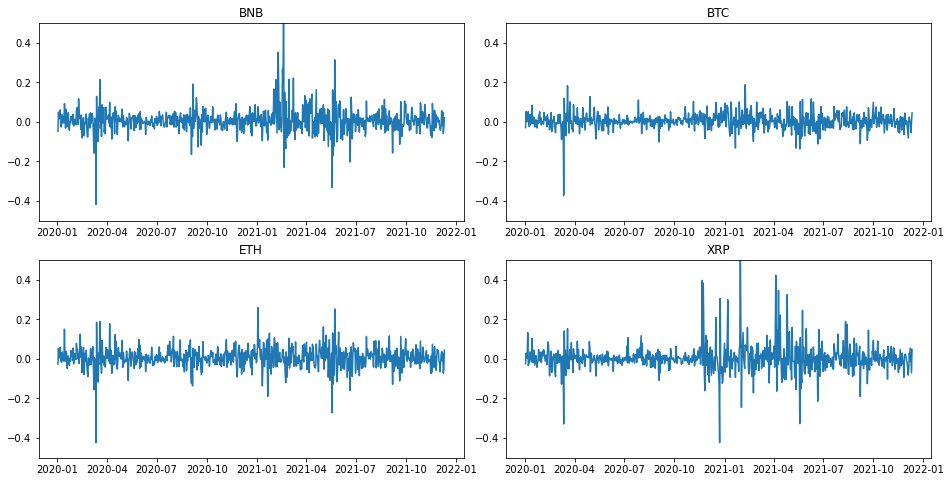

In [54]:
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(returns['BNB-USD'])
axs[0,0].set_title('BNB')
axs[0,0].set_ylim([-0.5,0.5])
axs[0,1].plot(returns['BTC-USD'])
axs[0,1].set_title('BTC')
axs[0,1].set_ylim([-0.5,0.5])
axs[1,0].plot(returns['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,0].set_ylim([-0.5,0.5])
axs[1,1].plot(returns['XRP-USD'])
axs[1,1].set_title('XRP')
axs[1,1].set_ylim([-0.5,0.5])
plt.show()

# Volatility

In [55]:
returns.std()

BNB-USD    0.064984
BTC-USD    0.040213
ETH-USD    0.053215
XRP-USD    0.071626
dtype: float64

The lower the standard deviation the lower the volatility. 
Therefore XRP- Ripple is the most volatile whilist BTC- Bitcoin is the least

# Cumulative Returns

In [56]:
creturn = ((1 + returns).cumprod() - 1) *100

In [57]:
creturn.head()

,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,
2020-01-02,-4.836498,-2.981929,-2.593097,-2.400000
2020-01-03,-0.209154,2.009812,2.576188,0.443244
2020-01-04,1.478761,2.923296,3.262461,0.876117
2020-01-05,3.082281,2.932472,4.185545,1.489613
2020-01-06,9.268148,7.903210,10.322588,14.970381


# plotting the Cumulative Returns 

Text(0.5, 1.0, 'Cumulative Returns')

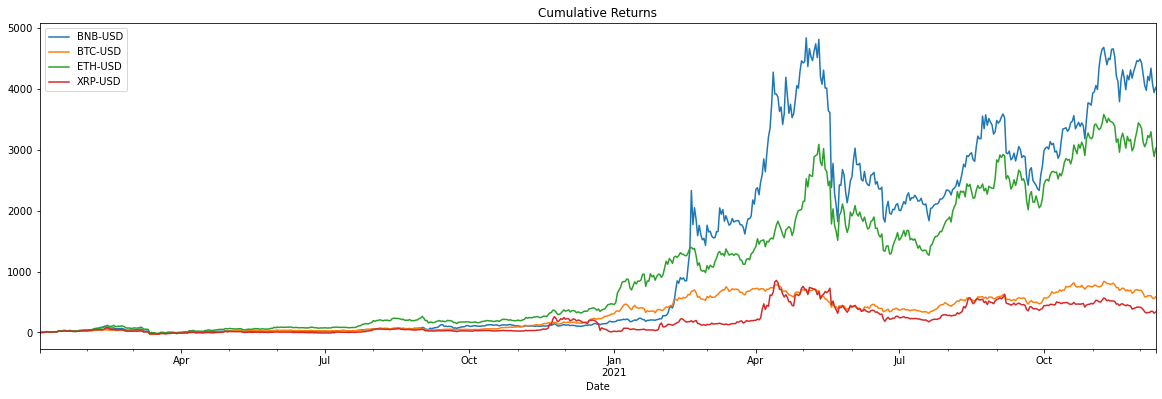

In [58]:
creturn.plot(figsize=(20,6))
plt.title('Cumulative Returns')

Binance (BNB) has the highest cumulative returns with Ripple (XRP) having the lowest. 

# Correlation

In [60]:
returns.corr()

,BNB-USD,BTC-USD,ETH-USD,XRP-USD
BNB-USD,1.000000,0.641323,0.658493,0.497827
BTC-USD,0.641323,1.000000,0.793526,0.541033
ETH-USD,0.658493,0.793526,1.000000,0.581529
XRP-USD,0.497827,0.541033,0.581529,1.000000


# Plotting Correlation 

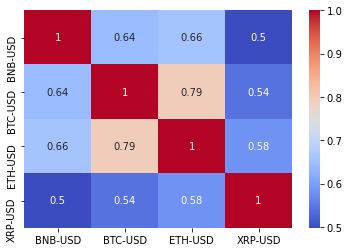

In [61]:
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.show()

Ethereum and Bitcoin have high correlation. 